In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Úlohy

V tejto časti váš čaká random dataset záznamov hrania hier. Jeden záznam pozozstáva [id_hráča, názov hry] ,ktorý nám hovorí, že hráč s id id_hráča sputil (v nejakom čase) danú hru.

In [3]:
hry = ["AssassinsCreed", "Borderlands", "Crysis", "Doom", "Witcher"]
data = pd.DataFrame({"Hrac" : np.random.randint(5, size=(1, 20))[0],
                    "Hra" : np.random.choice(hry, size=(1, 20))[0]})              
data

,Hrac,Hra
0,3,Crysis
1,4,Borderlands
2,1,Doom
3,4,Borderlands
4,2,Borderlands
5,0,Crysis
6,4,Witcher
7,0,Witcher
8,2,Witcher
9,4,Crysis


Vašou úlohou je teraz vyfiltrovať iba hráčov, ktorí hrali Crysis. Akceptovaný je iba príkaz na jeden riadok.

In [4]:
data[data.Hra == "Crysis"]

,Hrac,Hra
0,3,Crysis
5,0,Crysis
9,4,Crysis
13,0,Crysis
18,0,Crysis


Teraz z pôvodných dát (Dataframe 'data') spočítajte koľko hráčov hralo jednotlivú hru (pre každú hru počet hráčov). Opäť sa akceptuje len jednoriadkový príkaz.

In [5]:
data.groupby("Hra").size()

Hra
AssassinsCreed    2
Borderlands       5
Crysis            5
Doom              2
Witcher           6
dtype: int64

Chcem sa pozrieť na jednotlivých hráčov, koľko krát hrali danú hru. Vytvorte novú tabuľku, kde riadky budú hráči, stĺpce budú hry a záznamy budú počty spustení hry hráčom.

In [6]:
data_new = data.groupby(["Hrac", "Hra"]).size().to_frame('size')
pd.pivot_table(data_new, values='size', index=['Hrac'], columns=['Hra'])

Hra,AssassinsCreed,Borderlands,Crysis,Doom,Witcher
Hrac,,,,,
0,NaN,NaN,3.0,NaN,1.0
1,NaN,NaN,NaN,1.0,1.0
2,NaN,3.0,NaN,1.0,1.0
3,2.0,NaN,1.0,NaN,1.0
4,NaN,2.0,1.0,NaN,2.0


## Koronavírus!

V tejto úlohe máte priravené dve série dát. Prvá sú počet vykonaných testov a druhá počet denných prírastkov pozitívne testovaných osôb na Slovensku od 6. 3. 2020 so 26. 9. 2020. Vašou úlohou je teraz tieto dve série zobraziť na jednom grafe.

In [7]:
testy = pd.Series([378, 66, 76, 69, 111, 97, 95, 58, 197, 289, 159, 318, 225, 301, 368, 440, 242, 451, 476, 335, 913, 747, 720, 401, 688, 877, 1191, 1454, 1889, 1524, 1036, 1448, 2042, 1690, 2301, 2174, 1580, 1324, 1302, 1439, 2967, 3351, 3144, 3323, 2458, 2694, 3468, 4525, 3840, 4828, 4839, 3171, 1767, 5472, 4584, 5150, 3698, 1450, 1584, 2060, 4742, 5161, 4694, 3910, 1488, 786, 2063, 4326, 4876, 3992, 4084, 2476, 971, 2041, 3371, 2933, 2751, 2236, 1649, 645, 1464, 2839, 2352, 1848, 3433, 1606, 274, 6418, 2336, 2135, 1832, 2639, 1180, 160, 851, 1545, 1500, 1262, 1511, 479, 47, 847, 1163, 787, 806, 1278, 301, 41, 661, 1257, 936, 1515, 1611, 931, 62, 784, 2063, 1708, 1801, 2216, 808, 50, 873, 2225, 2284, 2172, 2879, 960, 279, 1163, 2205, 2336, 1862, 2161, 410, 24, 3333, 2571, 2251, 2049, 2275, 767, 216, 1548, 2296, 1851, 2176, 2884, 585, 766, 1320, 2538, 2667, 2473, 3099, 1068, 564, 1454, 3131, 2741, 2738, 3235, 2013, 481, 1583, 3684, 3435, 3245, 3833, 1723, 929, 2103, 4090, 3636, 4360, 4453, 1951, 588, 2763, 2428, 3519, 4772, 5947, 2462, 922, 2891, 5309, 5021, 4266, 6191, 3080, 1425, 4323, 3235, 4027, 5542, 5750, 3443, 1952, 2664, 6231, 5213, 5540, 6483, 5655])
prirastky = pd.Series([1, 2, 2, 2, 0, 3, 11, 11, 12, 17, 11, 24, 8, 19, 14, 41, 7, 19, 12, 10, 43, 23, 22, 22, 27, 37, 26, 24, 21, 14, 49, 47, 101, 19, 14, 13, 14, 27, 66, 28, 114, 72, 40, 72, 12, 26, 45, 81, 35, 13, 6, 2, 3, 7, 5, 7, 4, 1, 5, 8, 8, 16, 10, 0, 2, 0, 8, 4, 8, 3, 13, 1, 1, 0, 1, 6, 1, 1, 5, 2, 2, 2, 5, 0, 1, 0, 1, 0, 3, 1, 0, 2, 0, 2, 1, 2, 8, 1, 3, 3, 4, 0, 9, 1, 14, 10, 1, 1, 1, 18, 23, 13, 14, 7, 1, 2, 20, 13, 20, 29, 15, 1, 2, 31, 53, 19, 23, 8, 1, 6, 19, 24, 14, 11, 3, 1, 41, 37, 31, 29, 23, 38, 2, 23, 41, 20, 27, 45, 7, 10, 14, 49, 63, 43, 43, 30, 3, 16, 75, 49, 62, 54, 47, 5, 15, 100, 80, 123, 91, 40, 68, 28, 84, 90, 102, 114, 34, 41, 72, 53, 121, 137, 226, 88, 22, 91, 161, 178, 186, 201, 79, 48, 188, 92, 161, 235, 290, 131, 79, 175, 338, 360, 419, 552, 478])

Text(0, 0.5, 'testy')

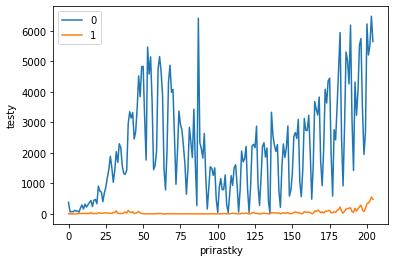

In [8]:
pd.concat([testy, prirastky], axis=1).plot()
plt.xlabel("prirastky")
plt.ylabel("testy")